In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

df = pd.read_csv("../data/reviews.csv")
df = df.dropna(subset=["reviews.text", "reviews.rating"])

In [2]:
def map_rating(r):
    if r <= 2: return "negative"
    elif r == 3: return "neutral"
    else: return "positive"

df["sentiment"] = df["reviews.rating"].apply(map_rating)

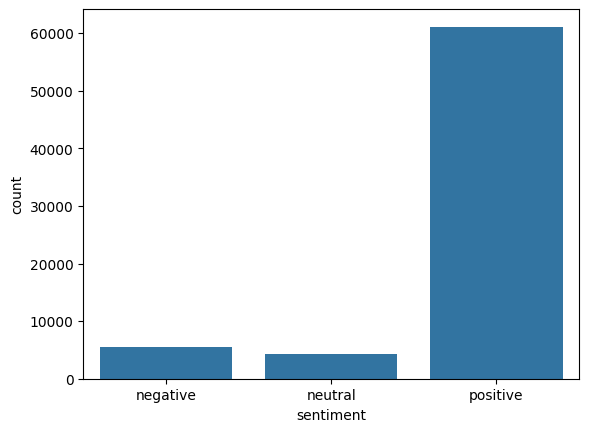

In [ ]:
sns.countplot(data=df, x="sentiment", order=["negative","neutral","positive"])
plt.show()

import sys, os
sys.path.append(os.path.abspath("..")) 
from src.preprocess import preprocess_text

df["clean_text"] = df["reviews.text"].apply(preprocess_text)

In [ ]:
def top_words(series, n=20):
    words = " ".join(series).split()
    return Counter(words).most_common(n)

for sentiment in ["negative", "neutral", "positive"]:
    print(sentiment, top_words(df[df["sentiment"] == sentiment]["clean_text"]))

negative [('product', 3356), ('one', 1634), ('new', 1524), ('like', 1499), ('use', 1404), ('used', 1381), ('would', 1361), ('hair', 1297), ('formula', 1290), ('mop', 1251), ('time', 1082), ('back', 1073), ('using', 1063), ('old', 1043), ('year', 1002), ('tide', 951), ('bought', 916), ('review', 902), ('smell', 900), ('pod', 877)]
neutral [('product', 1718), ('movie', 1664), ('good', 1279), ('like', 1240), ('review', 1161), ('skin', 1140), ('part', 1123), ('would', 1020), ('promotion', 961), ('collected', 957), ('one', 880), ('great', 843), ('use', 811), ('hair', 694), ('really', 646), ('first', 627), ('using', 599), ('time', 561), ('didnt', 546), ('day', 533)]
positive [('movie', 19860), ('product', 19765), ('great', 19365), ('review', 17456), ('part', 17220), ('love', 17031), ('promotion', 16248), ('collected', 16243), ('use', 13738), ('good', 10162), ('like', 8792), ('skin', 8754), ('one', 8320), ('clean', 8171), ('really', 7301), ('hair', 7000), ('wipe', 6432), ('smell', 6274), ('us

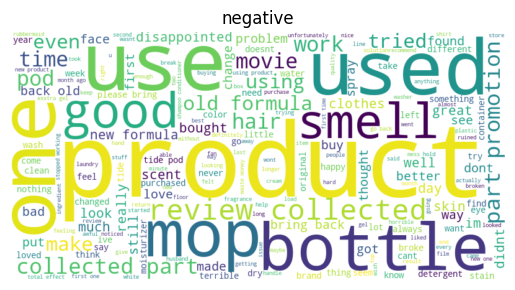

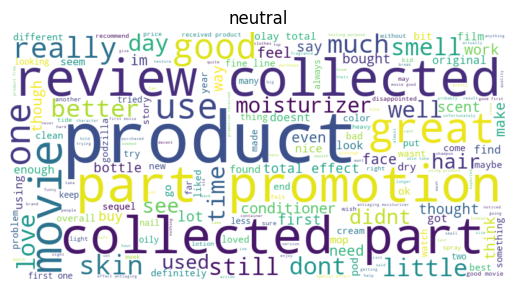

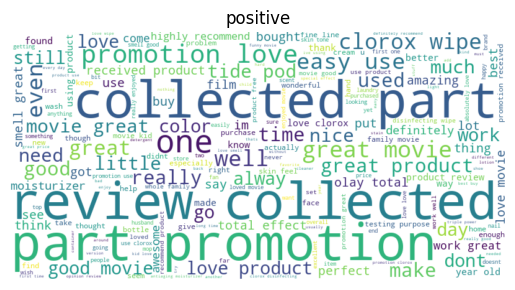

In [6]:
for sentiment in ["negative","neutral","positive"]:
    text = " ".join(df[df["sentiment"]==sentiment]["clean_text"])
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(sentiment)
    plt.show()

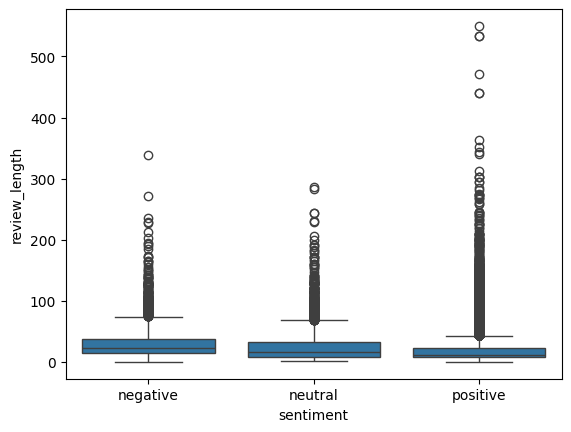

In [7]:
df["review_length"] = df["clean_text"].apply(lambda x: len(x.split()))
sns.boxplot(data=df, x="sentiment", y="review_length", order=["negative","neutral","positive"])
plt.show()